In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report,silhouette_score

In [3]:
df= pd.read_csv("mini prjt data set.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.duplicated().sum()

np.int64(240)

In [12]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


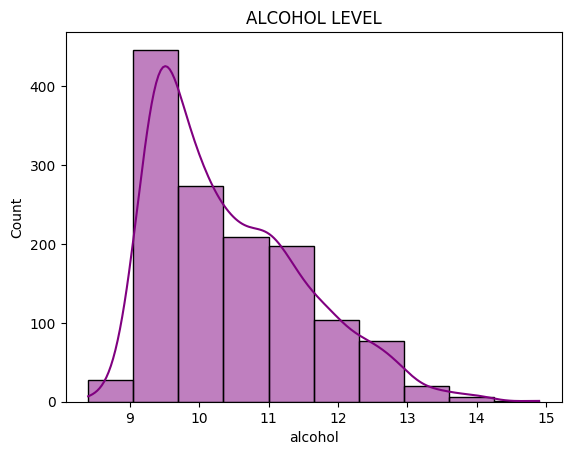

In [13]:
sns.histplot(df['alcohol'],bins=10,kde=True,color='PURPLE',edgecolor='BLACK')
plt.title("ALCOHOL LEVEL")
plt.show()

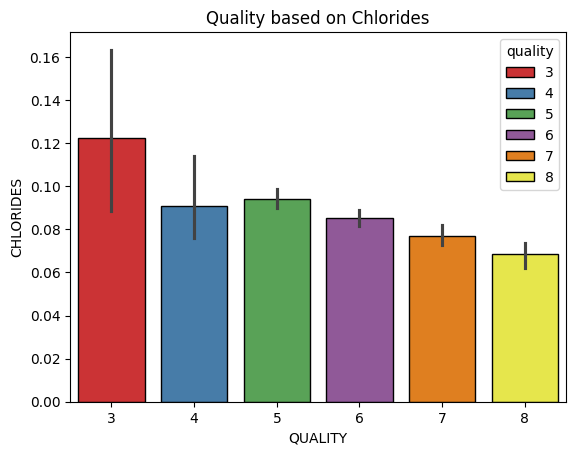

In [14]:
sns.barplot(df,x='quality',y='chlorides',hue='quality',palette='Set1',edgecolor='black',legend=True)
plt.xlabel("QUALITY")
plt.ylabel("CHLORIDES")
plt.title("Quality based on Chlorides")
plt.show()

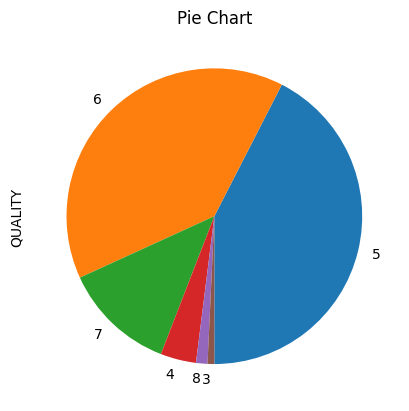

In [15]:
df['quality'].value_counts().plot.pie(startangle=-90)
plt.title("Pie Chart")
plt.ylabel("QUALITY") 
plt.show()

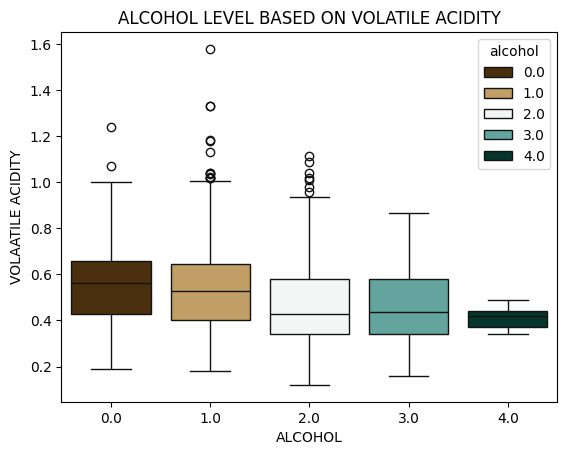

In [16]:
df.loc[:,'alcohol']= pd.cut(df['alcohol'],bins=5,labels=False)
sns.boxplot(df,x='alcohol',y='volatile acidity',palette='BrBG',hue='alcohol')
plt.xlabel('ALCOHOL')
plt.ylabel('VOLAATILE ACIDITY')

plt.title('ALCOHOL LEVEL BASED ON VOLATILE ACIDITY')
plt.show()

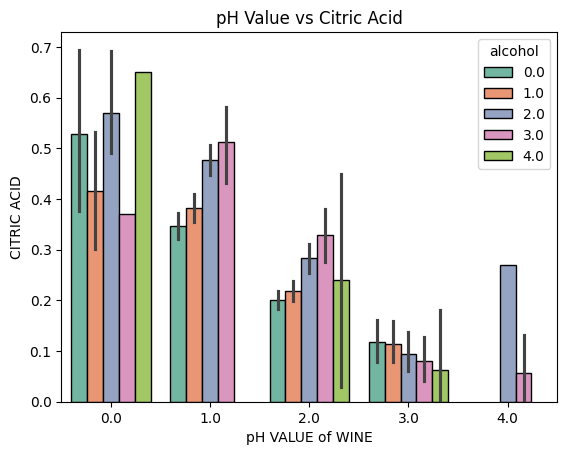

In [17]:
df.loc[:,'pH']=pd.cut(df['pH'],bins=5,labels=False)
sns.barplot(df,x='pH',y='citric acid', hue="alcohol",palette='Set2',edgecolor='black')
plt.xlabel("pH VALUE of WINE")
plt.ylabel("CITRIC ACID")
plt.title("pH Value vs Citric Acid")
plt.show()

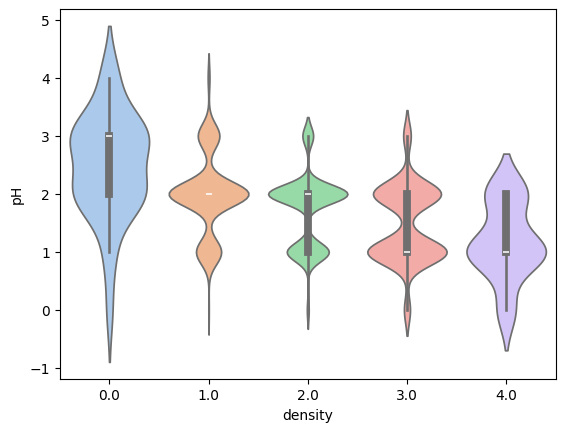

In [18]:
df.loc[:,'density']=pd.cut(df['density'],bins=5,labels=False)
sns.violinplot(df,x='density',y='pH',palette='pastel',hue='density',legend=False)
plt.show()

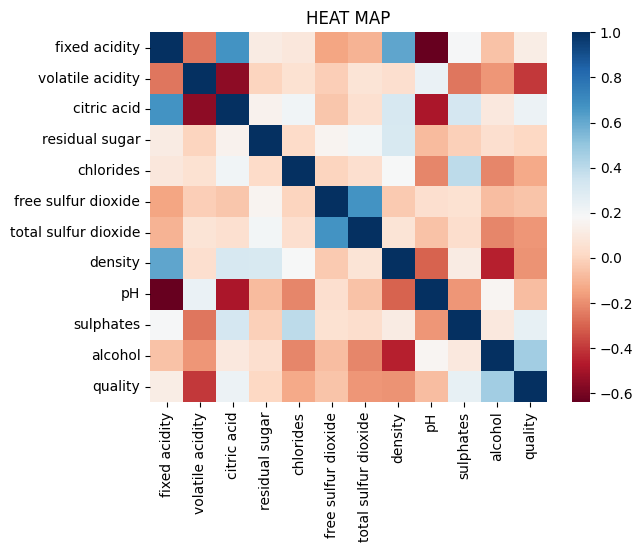

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='RdBu')
plt.title('HEAT MAP')
plt.show()

In [20]:
x=df.drop('quality',axis=1)
y=df['quality']

In [21]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-0.52443096  0.93200015 -1.39325797 ...  1.85096004 -0.57856134
  -1.07750228]
 [-0.29406274  1.91580043 -1.39325797 ... -1.13474286  0.12482157
   0.0120257 ]
 [-0.29406274  1.25993358 -1.18861732 ...  0.35810859 -0.05102416
   0.0120257 ]
 ...
 [-1.38831178  0.11216658 -0.88165635 ...  1.85096004  0.59374351
   1.10155367]
 [-1.38831178  0.63139451 -0.77933603 ...  1.85096004  0.3006673
   0.0120257 ]
 [-1.33071973 -1.19956712  1.01126962 ...  0.35810859  0.00759108
   0.0120257 ]]


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print("TrainSize:",x_train.shape,"TestSize:",x_test.shape)

TrainSize: (1087, 11) TestSize: (272, 11)


In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

print("regression Accuracy(MSE->mean squared error:",mean_squared_error(y_test,y_pred))

regression Accuracy(MSE->mean squared error: 0.43082763757546716


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("ClassificationReporter:",classification_report(y_test,y_pred_rf,zero_division=0))

Accuracy: 0.6470588235294118
ClassificationReporter:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.70      0.75      0.73       120
           6       0.58      0.68      0.63       103
           7       0.73      0.52      0.60        31
           8       0.00      0.00      0.00         3

    accuracy                           0.65       272
   macro avg       0.34      0.32      0.33       272
weighted avg       0.61      0.65      0.63       272



In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

df.loc[:,'cluster'] = kmeans.labels_
print("Silhouette Score:", silhouette_score(x_scaled, kmeans.labels_))

Silhouette Score: 0.16011853475147228


C:\Users\91900\AppData\Local\Temp\ipykernel_25800\1831872373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'cluster'] = kmeans.labels_
